<a href="https://colab.research.google.com/github/sulimankhan587/RICE/blob/main/Code_RICE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.io import arff
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_excel("/content/Rice_Cammeo_Osmancik.xlsx")
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
df["Class"] = df["Class"].astype("category")
df["Class"] = df["Class"].cat.codes
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,1
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,1
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,1
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,1


In [ ]:
#Split data into X and y
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [ ]:
# K-Means
from sklearn.cluster import KMeans
num_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans_labels = kmeans.fit_predict(X_train)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

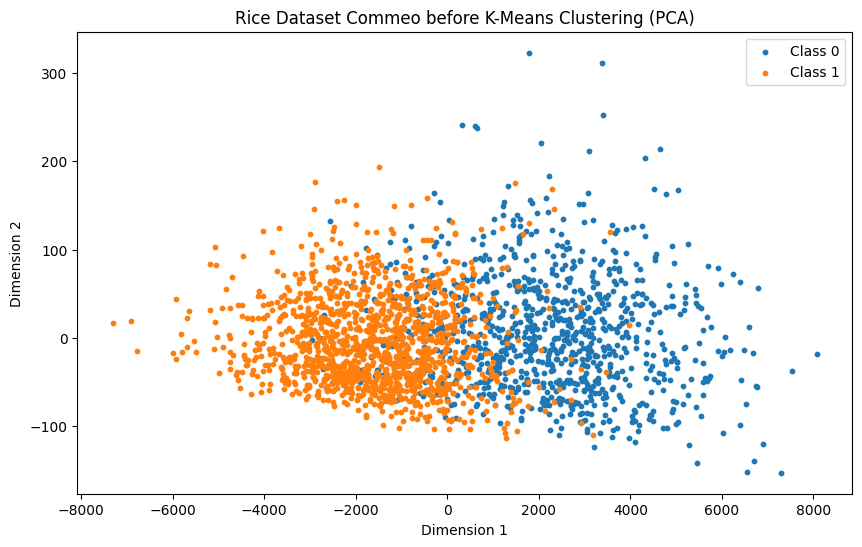

In [ ]:
# Define a function to plot the dataset with class labels
def plot_dataset_with_labels(X, labels, title):
    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Class {label}', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Plot the Rice Dataset Commeo before K-Means clustering
plot_dataset_with_labels(X_train_pca, y_train, 'Rice Dataset before K-Means Clustering (PCA)')




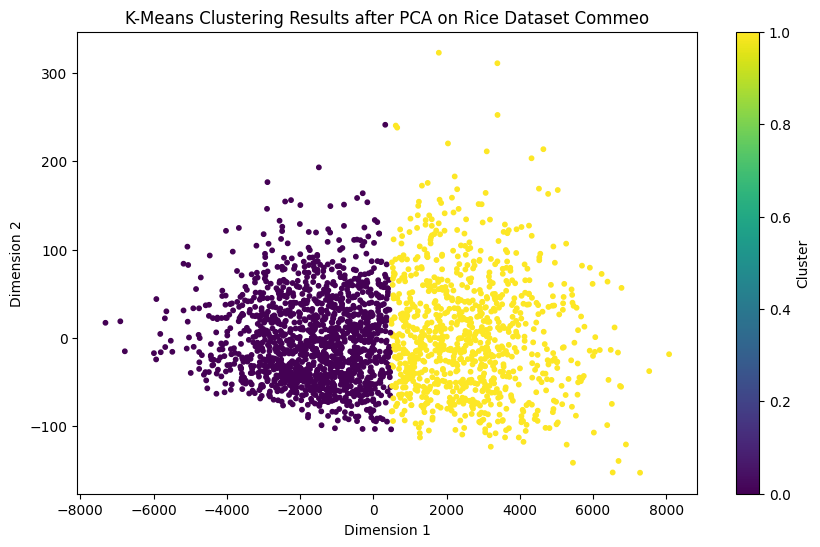

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_pca, kmeans_labels, 'K-Means Clustering Results after PCA on Rice Dataset ')




## ICA

In [ ]:
# ICA
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
X_train_ica = ica.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import FastICA
ica_test = FastICA(n_components=2)
X_test_ica = ica_test.fit_transform(X_test)

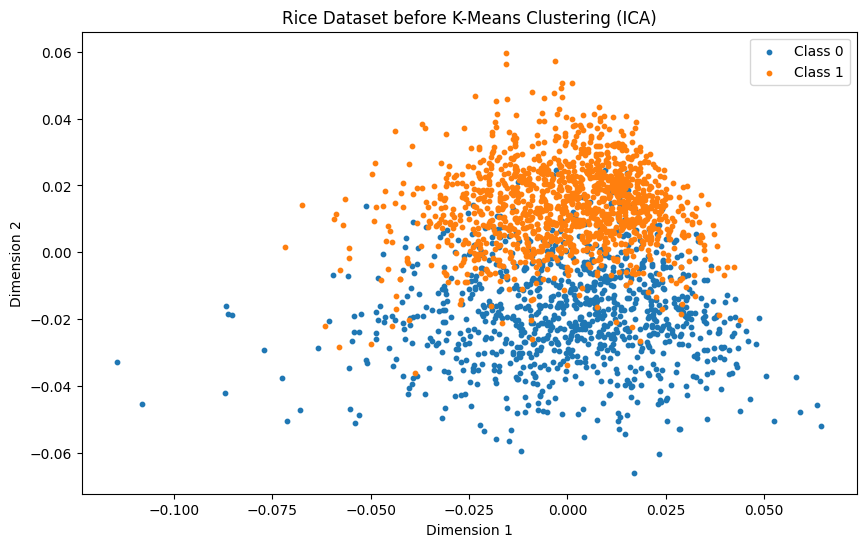

In [ ]:
# Define a function to plot the dataset with class labels
def plot_dataset_with_labels(X, labels, title):
    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Class {label}', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Plot the Rice Dataset Commeo before K-Means clustering
plot_dataset_with_labels(X_train_ica, y_train, 'Rice Dataset before K-Means Clustering (ICA)')

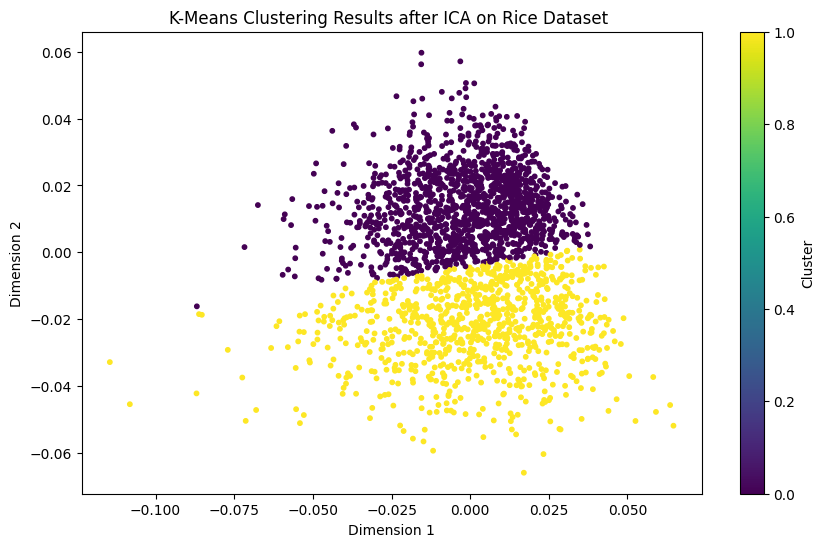

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_ica, kmeans_labels, 'K-Means Clustering Results after ICA on Rice Dataset ')

## RP

In [ ]:
# Randomized Projections
from sklearn.random_projection import GaussianRandomProjection
rp = GaussianRandomProjection(n_components=2)
X_train_rp = rp.fit_transform(X_train)

In [ ]:

rp_test = GaussianRandomProjection(n_components=2)
X_test_rp = rp_test.fit_transform(X_test)

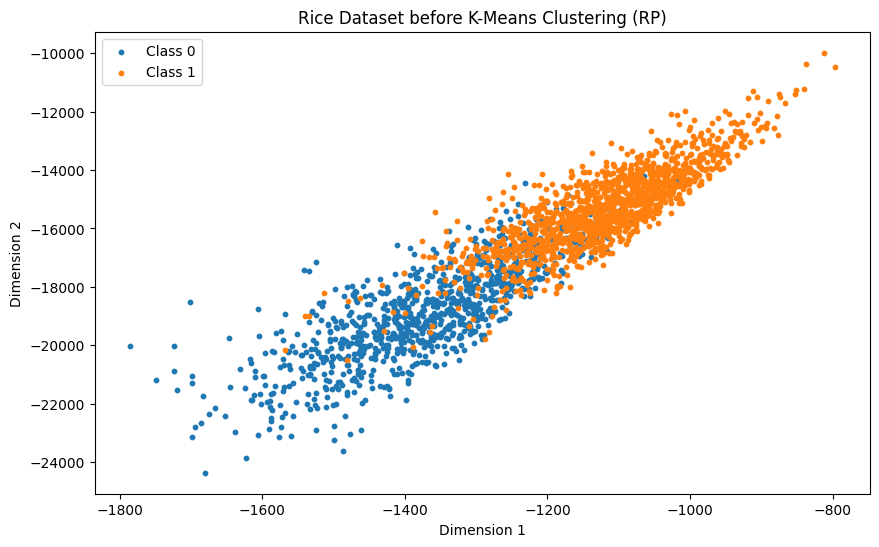

In [ ]:
# Define a function to plot the dataset with class labels
def plot_dataset_with_labels(X, labels, title):
    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Class {label}', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Plot the Rice Dataset Commeo before K-Means clustering
plot_dataset_with_labels(X_train_rp, y_train, 'Rice Dataset before K-Means Clustering (RP)')

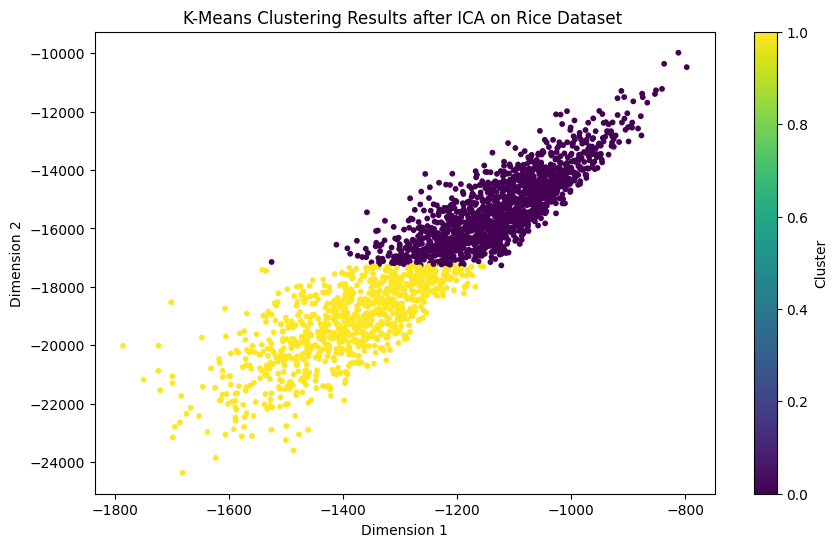

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_rp, kmeans_labels, 'K-Means Clustering Results after ICA on Rice Dataset ')

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

In [ ]:
tsne_test = TSNE(n_components=2)
X_test_tsne = tsne_test.fit_transform(X_test)

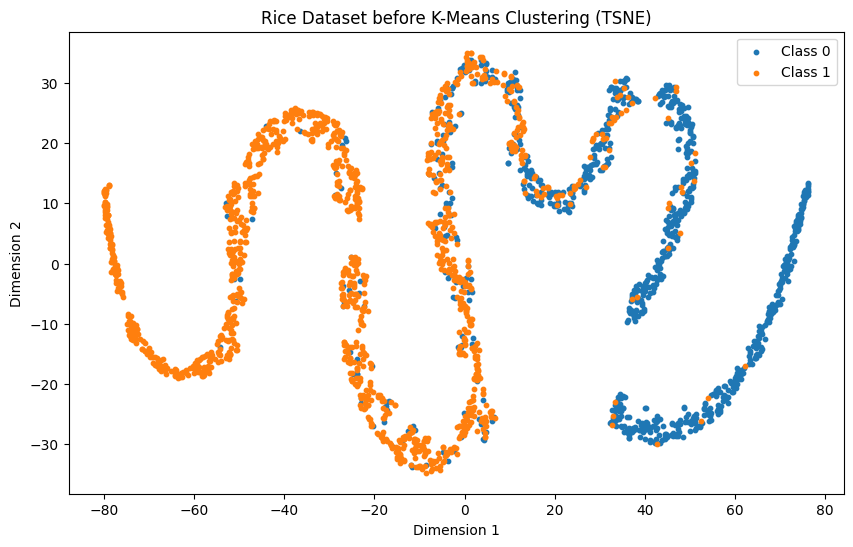

In [ ]:
# Define a function to plot the dataset with class labels
def plot_dataset_with_labels(X, labels, title):
    plt.figure(figsize=(10, 6))
    for label in np.unique(labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Class {label}', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Plot the Rice Dataset Commeo before K-Means clustering
plot_dataset_with_labels(X_train_tsne, y_train, 'Rice Dataset before K-Means Clustering (TSNE)')

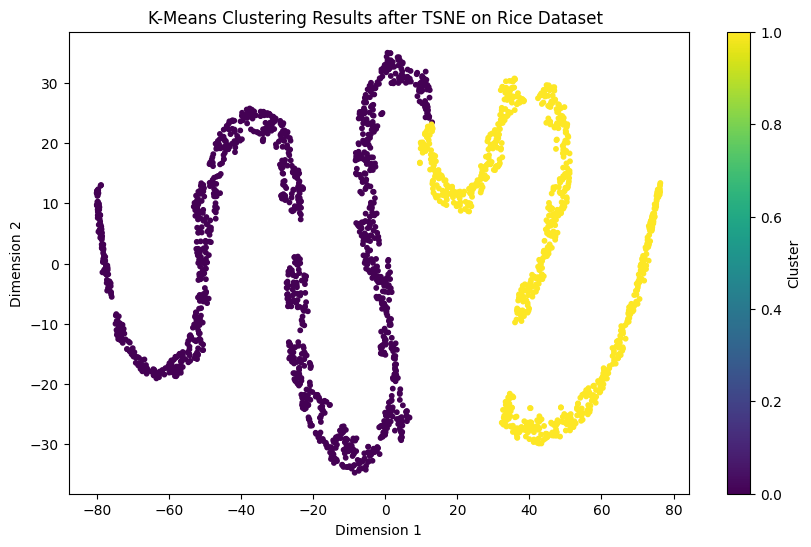

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_tsne, kmeans_labels, 'K-Means Clustering Results after TSNE on Rice Dataset ')

# Expectation Maximization (EM)

In [ ]:
# Expectation Maximization (EM)
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=num_clusters)
em_labels = em.fit_predict(X_train)

In [ ]:
# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

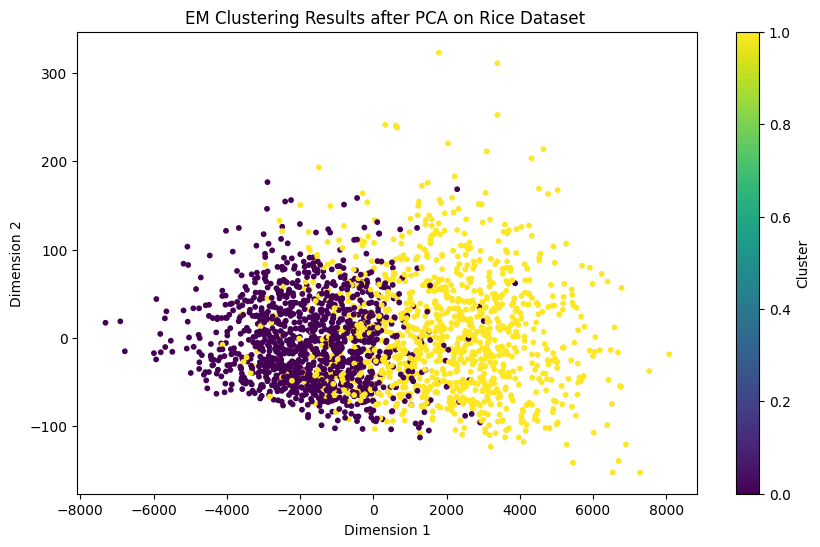

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_pca, em_labels, 'EM Clustering Results after PCA on Rice Dataset ')

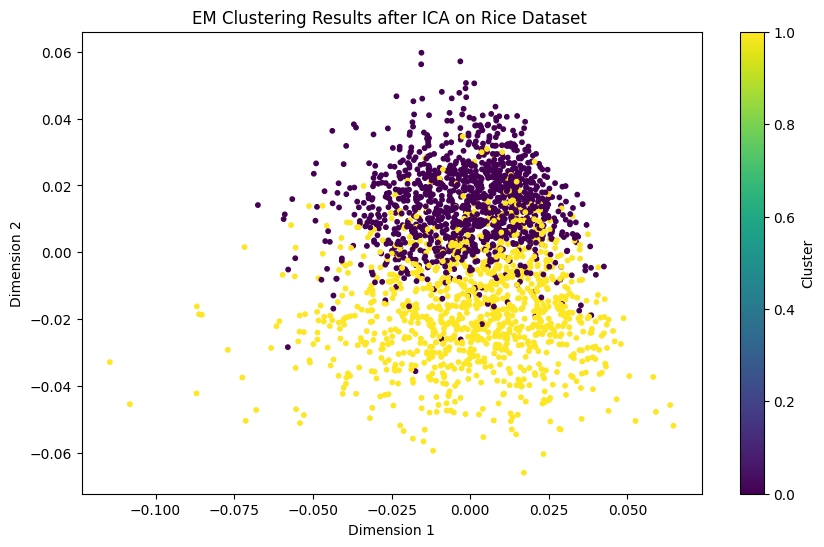

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_ica, em_labels, 'EM Clustering Results after ICA on Rice Dataset ')

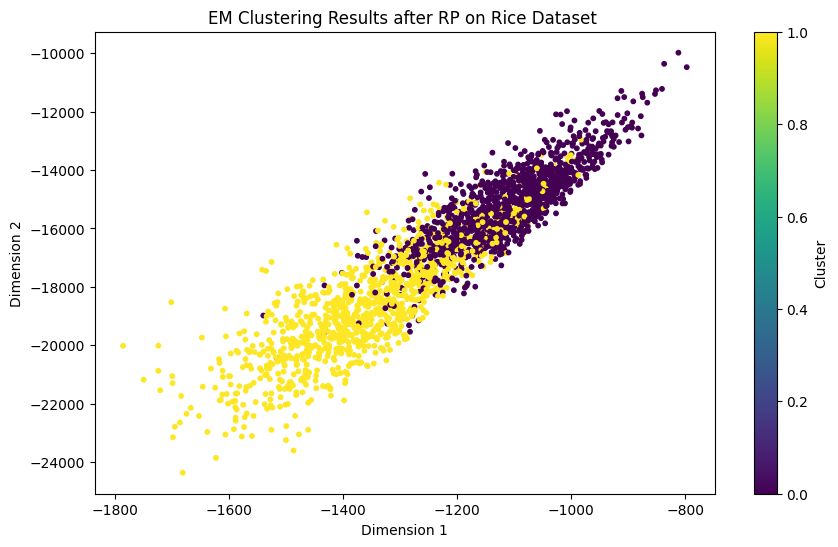

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_rp, em_labels, 'EM Clustering Results after RP on Rice Dataset ')

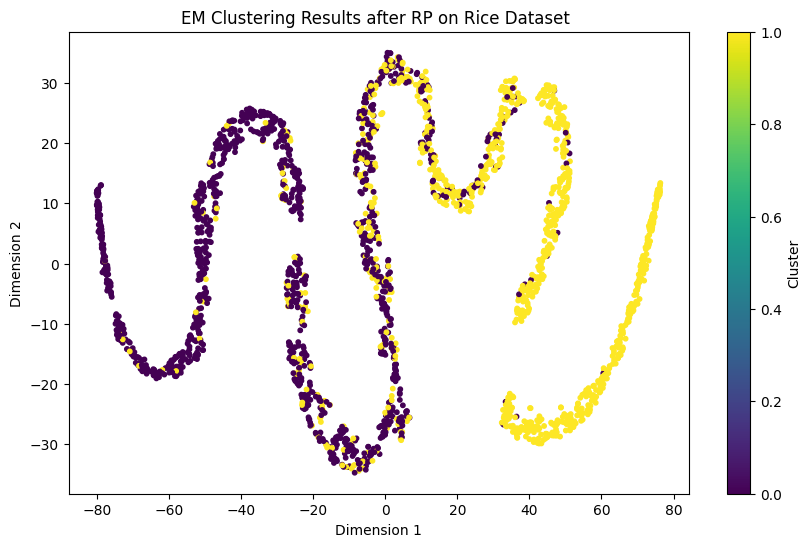

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot clustering results for PCA
plot_clusters(X_train_tsne, em_labels, 'EM Clustering Results after RP on Rice Dataset ')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Train the MLPClassifier on the reduced-dimensional data

# For Rice Dataset
mlp_classifier.fit(X_train_pca, y_train)  # Using PCA-reduced data for training

# For Rice Dataset
mlp_classifier.fit(X_train_ica, y_train)  # Using PCA-reduced data for training

# For Rice Dataset
mlp_classifier.fit(X_train_rp, y_train)  # Using PCA-reduced data for training

# For Rice Dataset
mlp_classifier.fit(X_train_tsne, y_train)  # Using PCA-reduced data for training

MLPClassifier(max_iter=100, random_state=42)

In [ ]:
y_pred_pca = mlp_classifier.predict(X_test_pca)
y_pred_ica = mlp_classifier.predict(X_test_ica)
y_pred_rp = mlp_classifier.predict(X_test_rp)
y_pred_tsne = mlp_classifier.predict(X_test_tsne)

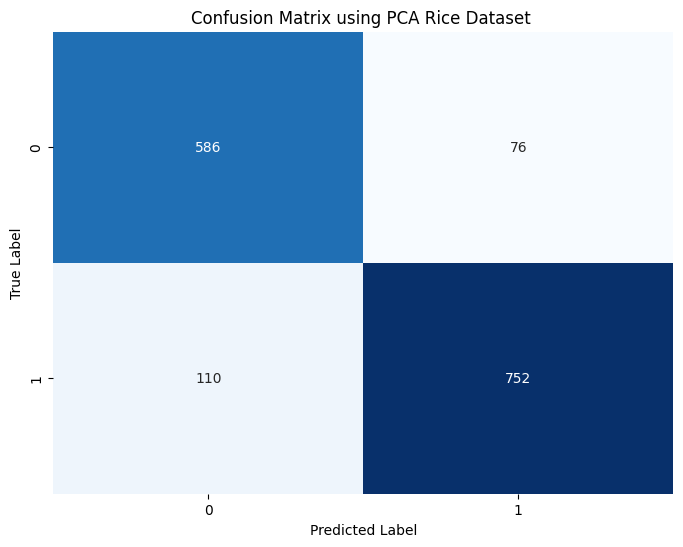

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Rice Dataset Commeo
cm = confusion_matrix(y_test, y_pred_pca)



# Plot confusion matrix for Rice Dataset Commeo
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix using PCA Rice Dataset ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

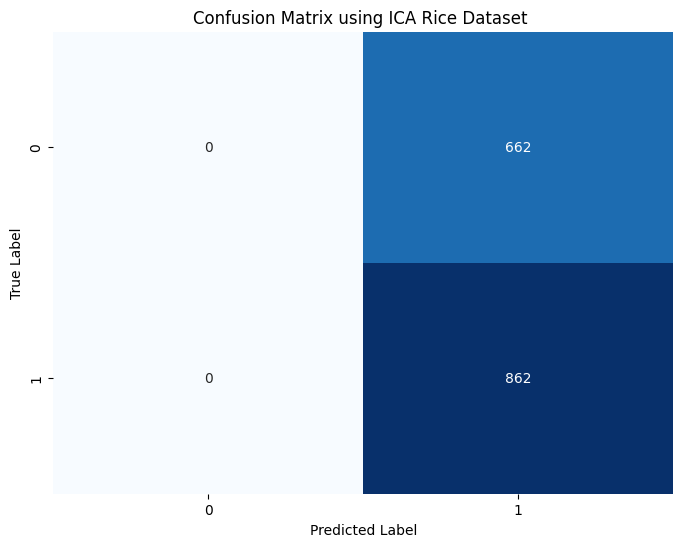

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Rice Dataset Commeo
cm = confusion_matrix(y_test, y_pred_ica)



# Plot confusion matrix for Rice Dataset Commeo
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix using ICA Rice Dataset ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

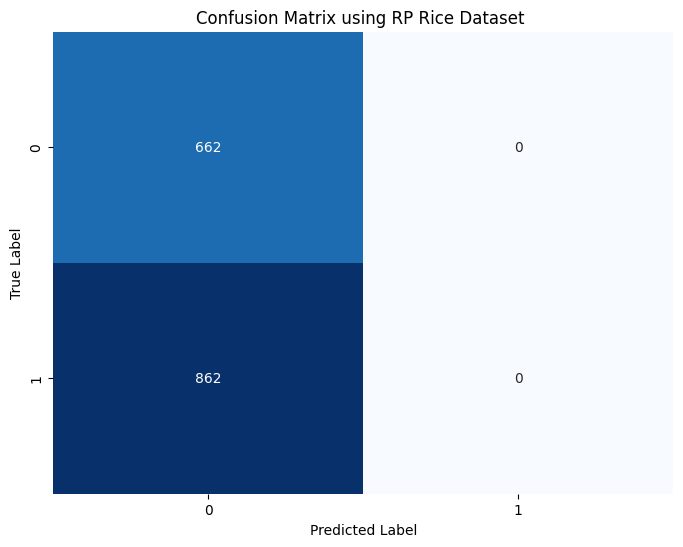

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Rice Dataset Commeo
cm = confusion_matrix(y_test, y_pred_rp)



# Plot confusion matrix for Rice Dataset Commeo
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix using RP Rice Dataset ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

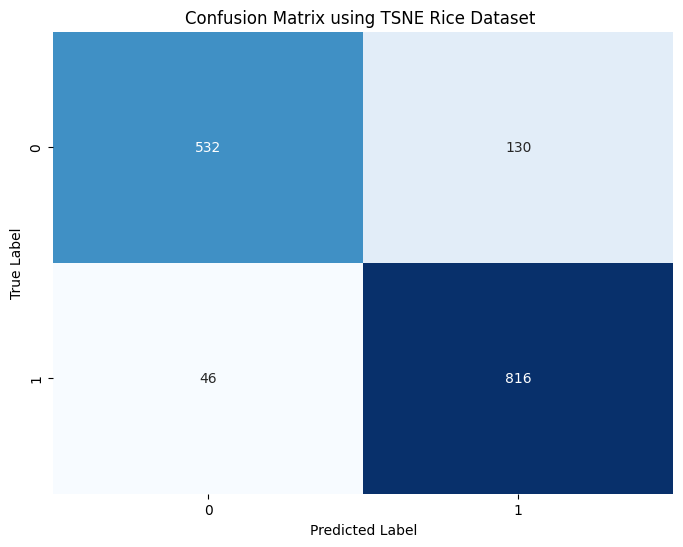

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Rice Dataset
cm = confusion_matrix(y_test, y_pred_tsne)



# Plot confusion matrix for Rice Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix using TSNE Rice Dataset ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(accuracy_pca)

accuracy_ica = accuracy_score(y_test, y_pred_ica)
print(accuracy_ica)

accuracy_rp = accuracy_score(y_test, y_pred_rp)
print(accuracy_rp)

accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
print(accuracy_tsne)

0.8779527559055118
0.5656167979002624
0.4343832020997375
0.884514435695538


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Concatenate original features with cluster labels
X_train_with_clusters = np.concatenate((X_train, kmeans_labels.reshape(-1, 1)), axis=1)
X_test_with_clusters = np.concatenate((X_test, kmeans.predict(X_test).reshape(-1, 1)), axis=1)

# Initialize the MLPClassifier
mlp_classifier_with_clusters = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Train the MLPClassifier on the data with cluster labels
mlp_classifier_with_clusters.fit(X_train_with_clusters, y_train)

# Predict labels for the test set
y_pred_with_clusters = mlp_classifier_with_clusters.predict(X_test_with_clusters)

# Evaluate the performance of the model
accuracy_with_kmean_clusters = accuracy_score(y_test, y_pred_with_clusters)

print("Accuracy of Neural Network after KM-Clustering:", accuracy_with_kmean_clusters)


Accuracy of Neural Network after KM-Clustering: 0.7408136482939632


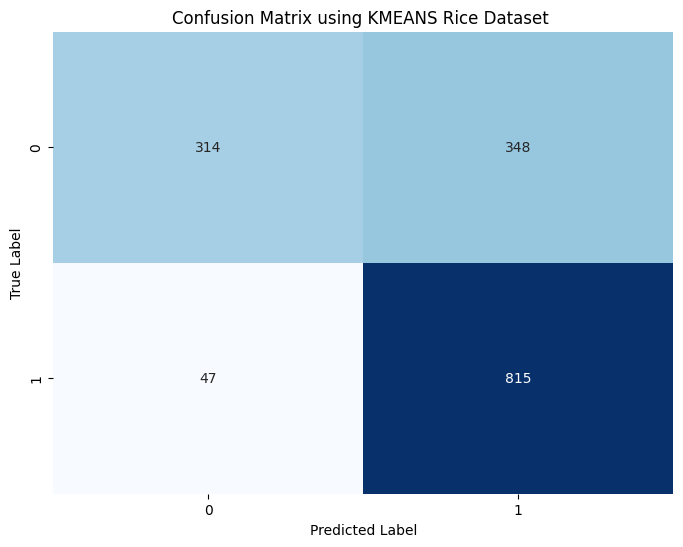

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Rice Dataset
cm = confusion_matrix(y_test, y_pred_with_clusters)



# Plot confusion matrix for Rice Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix using KMEANS Rice Dataset ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Concatenate original features with cluster labels
X_train_with_clusters = np.concatenate((X_train, em_labels.reshape(-1, 1)), axis=1)
X_test_with_clusters = np.concatenate((X_test, em.predict(X_test).reshape(-1, 1)), axis=1)

# Initialize the MLPClassifier
mlp_classifier_with_clusters = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Train the MLPClassifier on the data with cluster labels
mlp_classifier_with_clusters.fit(X_train_with_clusters, y_train)

# Predict labels for the test set
y_pred_with_clusters = mlp_classifier_with_clusters.predict(X_test_with_clusters)

# Evaluate the performance of the model
accuracy_with_em_clusters = accuracy_score(y_test, y_pred_with_clusters)

print("Accuracy of Neural Network after EM Clustering:", accuracy_with_em_clusters)

Accuracy of Neural Network after EM Clustering: 0.5085301837270341


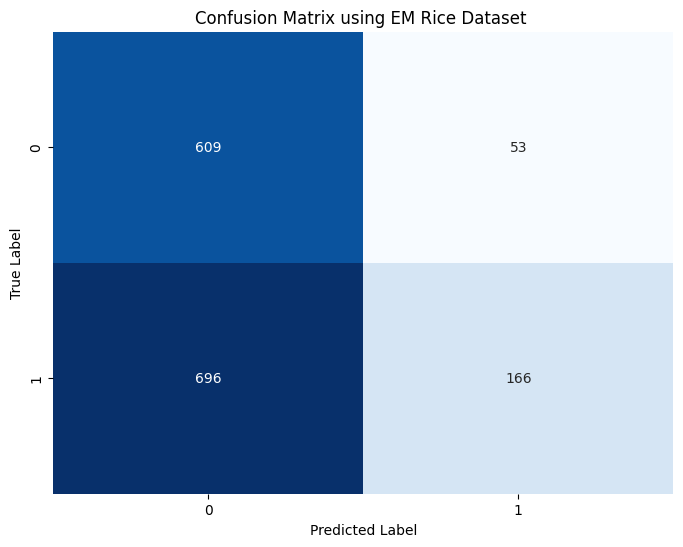

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Rice Dataset
cm = confusion_matrix(y_test, y_pred_with_clusters)



# Plot confusion matrix for Rice Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix using EM Rice Dataset ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

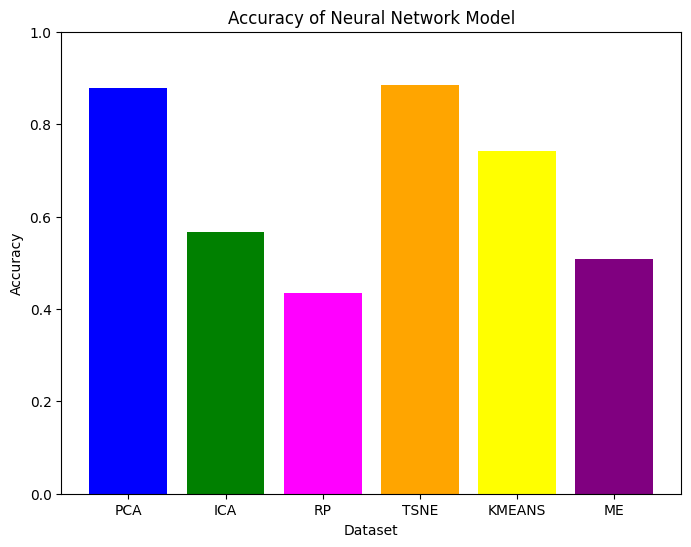

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_pca,accuracy_ica,accuracy_rp,accuracy_tsne,accuracy_with_kmean_clusters,accuracy_with_em_clusters]
datasets = ['PCA','ICA','RP',"TSNE","KMEANS",'ME']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(datasets, accuracy_scores, color=['blue', 'green', 'magenta', 'orange', 'yellow', 'purple'])
plt.title('Accuracy of Neural Network Model')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1
plt.show()